In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
df = pd.read_csv('csv/covid19_regioni.csv')
df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,NaN


In [2]:
df.drop(['stato', 'codice_regione', 'lat', 'long', 'ricoverati_con_sintomi','terapia_intensiva', 'totale_ospedalizzati',
        'isolamento_domiciliare', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 
         'casi_da_sospetto_diagnostico', 'casi_da_screening','totale_casi','tamponi', 'casi_testati', 'note', 
         'totale_positivi'], axis=1, inplace=True)
df.head()

,data,denominazione_regione,deceduti
0,2020-02-24T18:00:00,Abruzzo,0
1,2020-02-24T18:00:00,Basilicata,0
2,2020-02-24T18:00:00,Calabria,0
3,2020-02-24T18:00:00,Campania,0
4,2020-02-24T18:00:00,Emilia-Romagna,0


In [3]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df['data'] = df['data'].dt.strftime('%Y-%m-%d')
df.head()

,data,denominazione_regione,deceduti
0,2020-02-24,Abruzzo,0
1,2020-02-24,Basilicata,0
2,2020-02-24,Calabria,0
3,2020-02-24,Campania,0
4,2020-02-24,Emilia-Romagna,0


In [4]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df['deceduti'] = pd.to_numeric(df['deceduti'])

In [5]:
df = df[df['data'] < '2020-07-01']
df = df[df['data'] > '2020-02-29']

<h2>ABRUZZO</h2>

In [6]:
abruzzo = df[df['denominazione_regione']=='Abruzzo']
abruzzo.head()

,data,denominazione_regione,deceduti
126,2020-03-01,Abruzzo,0
147,2020-03-02,Abruzzo,0
168,2020-03-03,Abruzzo,0
189,2020-03-04,Abruzzo,0
210,2020-03-05,Abruzzo,0


In [7]:
abruzzo.drop(['denominazione_regione'], axis=1, inplace=True)
abruzzo.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
126,2020-03-01,0
147,2020-03-02,0
168,2020-03-03,0
189,2020-03-04,0
210,2020-03-05,0


In [8]:
abruzzo=abruzzo.set_index('data')
abruzzo.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [9]:
abruzzo = abruzzo.diff()
abruzzo.fillna(0, inplace=True)
abruzzo.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [10]:
abruzzo = abruzzo.groupby(pd.Grouper(freq='M')).sum()
abruzzo.head()

,deceduti
data,
2020-03-31,115.0
2020-04-30,205.0
2020-05-31,85.0
2020-06-30,59.0


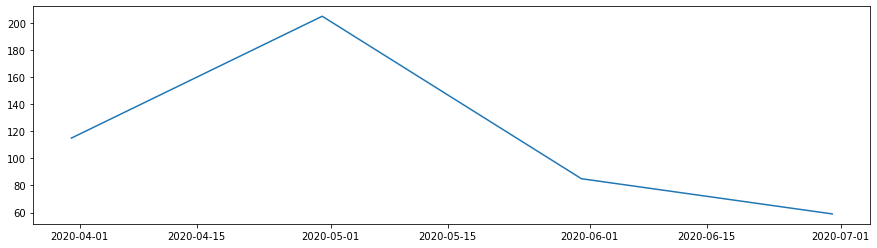

In [11]:
plt.figure(figsize=(15,4))
plt.plot(abruzzo)
plt.show()

In [12]:
abruzzo = abruzzo * 0.921
abruzzo.head()

,deceduti
data,
2020-03-31,105.915
2020-04-30,188.805
2020-05-31,78.285
2020-06-30,54.339


In [13]:
abruzzo.to_csv('csv/regioni_pesate/abruzzo.csv')

<h2>BASILICATA</h2>

In [14]:
basilicata = df[df['denominazione_regione']=='Basilicata']
basilicata.head()

,data,denominazione_regione,deceduti
127,2020-03-01,Basilicata,0
148,2020-03-02,Basilicata,0
169,2020-03-03,Basilicata,0
190,2020-03-04,Basilicata,0
211,2020-03-05,Basilicata,0


In [15]:
basilicata.drop(['denominazione_regione'], axis=1, inplace=True)
basilicata.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
127,2020-03-01,0
148,2020-03-02,0
169,2020-03-03,0
190,2020-03-04,0
211,2020-03-05,0


In [16]:
basilicata = basilicata.set_index('data')
basilicata.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [17]:
basilicata = basilicata.diff()
basilicata.fillna(0, inplace=True)
basilicata.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [18]:
basilicata = basilicata.groupby(pd.Grouper(freq='M')).sum()
basilicata.head()

,deceduti
data,
2020-03-31,7.0
2020-04-30,18.0
2020-05-31,2.0
2020-06-30,0.0


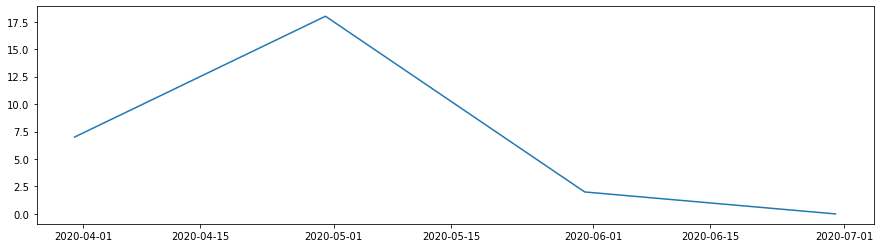

In [19]:
plt.figure(figsize=(15,4))
plt.plot(basilicata)
plt.show()

In [20]:
basilicata = basilicata * 0.939
basilicata.head()

,deceduti
data,
2020-03-31,6.573
2020-04-30,16.902
2020-05-31,1.878
2020-06-30,0.000


In [21]:
basilicata.to_csv('csv/regioni_pesate/basilicata.csv')

<h2>CALABRIA</h2>

In [22]:
calabria = df[df['denominazione_regione']=='Calabria']
calabria.head()

,data,denominazione_regione,deceduti
128,2020-03-01,Calabria,0
149,2020-03-02,Calabria,0
170,2020-03-03,Calabria,0
191,2020-03-04,Calabria,0
212,2020-03-05,Calabria,0


In [23]:
calabria.drop(['denominazione_regione'], axis=1, inplace=True)
calabria.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
128,2020-03-01,0
149,2020-03-02,0
170,2020-03-03,0
191,2020-03-04,0
212,2020-03-05,0


In [24]:
calabria = calabria.set_index('data')
calabria.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [25]:
calabria = calabria.diff()
calabria.fillna(0, inplace=True)
calabria.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [26]:
calabria = calabria.groupby(pd.Grouper(freq='M')).sum()
calabria.head()

,deceduti
data,
2020-03-31,36.0
2020-04-30,50.0
2020-05-31,11.0
2020-06-30,0.0


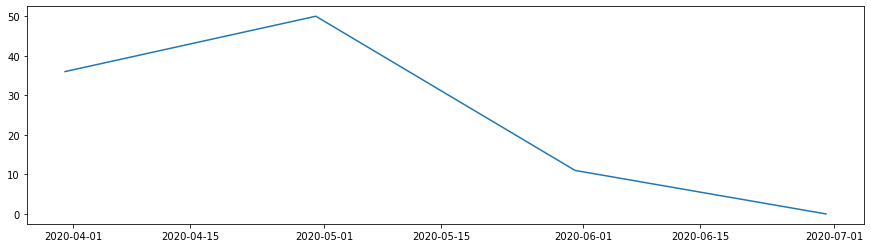

In [27]:
plt.figure(figsize=(15,4))
plt.plot(calabria)
plt.show()

In [28]:
calabria = calabria * 0.921
calabria.head()

,deceduti
data,
2020-03-31,33.156
2020-04-30,46.050
2020-05-31,10.131
2020-06-30,0.000


In [29]:
calabria.to_csv('csv/regioni_pesate/calabria.csv')

<h2>CAMPANIA</h2>

In [30]:
campania = df[df['denominazione_regione']=='Campania']
campania.head()

,data,denominazione_regione,deceduti
129,2020-03-01,Campania,0
150,2020-03-02,Campania,0
171,2020-03-03,Campania,0
192,2020-03-04,Campania,0
213,2020-03-05,Campania,0


In [31]:
campania.drop(['denominazione_regione'], axis=1, inplace=True)
campania.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
129,2020-03-01,0
150,2020-03-02,0
171,2020-03-03,0
192,2020-03-04,0
213,2020-03-05,0


In [32]:
campania = campania.set_index('data')
campania.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [33]:
campania = campania.diff()
campania.fillna(0, inplace=True)
campania.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [34]:
campania = campania.groupby(pd.Grouper(freq='M')).sum()
campania.head()

,deceduti
data,
2020-03-31,133.0
2020-04-30,226.0
2020-05-31,53.0
2020-06-30,20.0


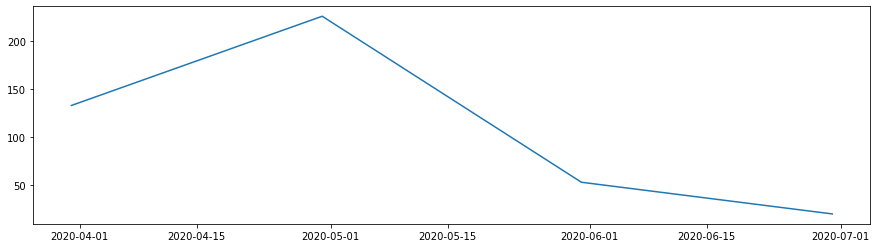

In [35]:
plt.figure(figsize=(15,4))
plt.plot(campania)
plt.show()

In [36]:
campania = campania * 0.902
campania.head()

,deceduti
data,
2020-03-31,119.966
2020-04-30,203.852
2020-05-31,47.806
2020-06-30,18.040


In [37]:
campania.to_csv('csv/regioni_pesate/campania.csv')

<h2>EMILIA ROMAGNA</h2>

In [38]:
emilia_romagna = df[df['denominazione_regione']=='Emilia-Romagna']
emilia_romagna.head()

,data,denominazione_regione,deceduti
130,2020-03-01,Emilia-Romagna,8
151,2020-03-02,Emilia-Romagna,11
172,2020-03-03,Emilia-Romagna,18
193,2020-03-04,Emilia-Romagna,22
214,2020-03-05,Emilia-Romagna,30


In [39]:
emilia_romagna.drop(['denominazione_regione'], axis=1, inplace=True)
emilia_romagna.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
130,2020-03-01,8
151,2020-03-02,11
172,2020-03-03,18
193,2020-03-04,22
214,2020-03-05,30


In [40]:
emilia_romagna = emilia_romagna.set_index('data')
emilia_romagna.head()

,deceduti
data,
2020-03-01,8
2020-03-02,11
2020-03-03,18
2020-03-04,22
2020-03-05,30


In [41]:
emilia_romagna = emilia_romagna.diff()
emilia_romagna.fillna(0, inplace=True)
emilia_romagna.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,3.0
2020-03-03,7.0
2020-03-04,4.0
2020-03-05,8.0


In [42]:
emilia_romagna = emilia_romagna.groupby(pd.Grouper(freq='M')).sum()
emilia_romagna.head()

,deceduti
data,
2020-03-31,1636.0
2020-04-30,1907.0
2020-05-31,563.0
2020-06-30,146.0


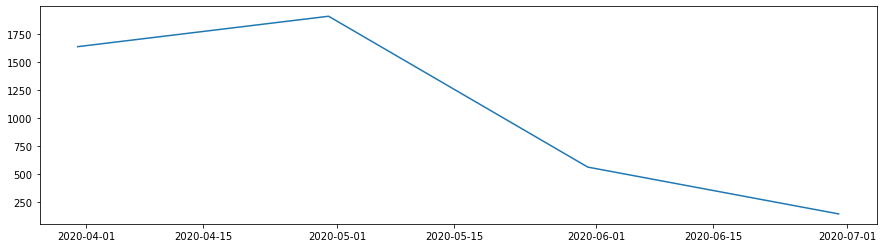

In [43]:
plt.figure(figsize=(15,4))
plt.plot(emilia_romagna)
plt.show()

In [44]:
emilia_romagna = emilia_romagna * 0.939
emilia_romagna.head()

,deceduti
data,
2020-03-31,1536.204
2020-04-30,1790.673
2020-05-31,528.657
2020-06-30,137.094


In [45]:
emilia_romagna.to_csv('csv/regioni_pesate/emilia_romagna.csv')

<h2>LOMBARDIA</h2>

In [46]:
lombardia = df[df['denominazione_regione']=='Lombardia']
lombardia.head()

,data,denominazione_regione,deceduti
134,2020-03-01,Lombardia,24
155,2020-03-02,Lombardia,38
176,2020-03-03,Lombardia,55
197,2020-03-04,Lombardia,73
218,2020-03-05,Lombardia,98


In [47]:
lombardia.drop(['denominazione_regione'], axis=1, inplace=True)
lombardia.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
134,2020-03-01,24
155,2020-03-02,38
176,2020-03-03,55
197,2020-03-04,73
218,2020-03-05,98


In [48]:
lombardia = lombardia.set_index('data')
lombardia.head()

,deceduti
data,
2020-03-01,24
2020-03-02,38
2020-03-03,55
2020-03-04,73
2020-03-05,98


In [49]:
lombardia = lombardia.diff()
lombardia.fillna(0, inplace=True)
lombardia.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,14.0
2020-03-03,17.0
2020-03-04,18.0
2020-03-05,25.0


In [50]:
lombardia = lombardia.groupby(pd.Grouper(freq='M')).sum()
lombardia.head()

,deceduti
data,
2020-03-31,7175.0
2020-04-30,6573.0
2020-05-31,2340.0
2020-06-30,532.0


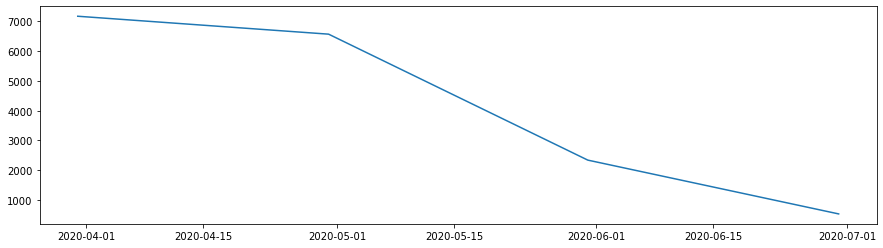

In [51]:
plt.figure(figsize=(15,4))
plt.plot(lombardia)
plt.show()

In [52]:
lombardia = lombardia * 0.975
lombardia.head()

,deceduti
data,
2020-03-31,6995.625
2020-04-30,6408.675
2020-05-31,2281.500
2020-06-30,518.700


In [53]:
lombardia.to_csv('csv/regioni_pesate/lombardia.csv')

<h2>FRIULI VENEZIA GIULIA </h2>

In [54]:
friuli_venezia_giulia = df[df['denominazione_regione']=='Friuli Venezia Giulia']
friuli_venezia_giulia.head()

,data,denominazione_regione,deceduti
131,2020-03-01,Friuli Venezia Giulia,0
152,2020-03-02,Friuli Venezia Giulia,0
173,2020-03-03,Friuli Venezia Giulia,0
194,2020-03-04,Friuli Venezia Giulia,0
215,2020-03-05,Friuli Venezia Giulia,0


In [55]:
friuli_venezia_giulia.drop(['denominazione_regione'], axis=1, inplace=True)
friuli_venezia_giulia.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
131,2020-03-01,0
152,2020-03-02,0
173,2020-03-03,0
194,2020-03-04,0
215,2020-03-05,0


In [56]:
friuli_venezia_giulia = friuli_venezia_giulia.set_index('data')
friuli_venezia_giulia.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [57]:
friuli_venezia_giulia = friuli_venezia_giulia.diff()
friuli_venezia_giulia.fillna(0, inplace=True)
friuli_venezia_giulia.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [58]:
friuli_venezia_giulia = friuli_venezia_giulia.groupby(pd.Grouper(freq='M')).sum()
friuli_venezia_giulia.head()

,deceduti
data,
2020-03-31,113.0
2020-04-30,176.0
2020-05-31,44.0
2020-06-30,12.0


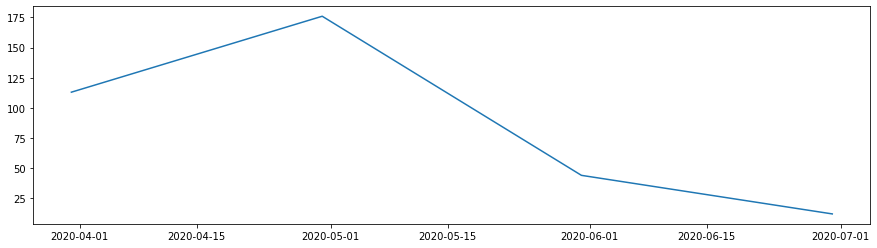

In [59]:
plt.figure(figsize=(15,4))
plt.plot(friuli_venezia_giulia)
plt.show()

In [60]:
friuli_venezia_giulia = friuli_venezia_giulia * 0.949
friuli_venezia_giulia.head()

,deceduti
data,
2020-03-31,107.237
2020-04-30,167.024
2020-05-31,41.756
2020-06-30,11.388


In [61]:
friuli_venezia_giulia.to_csv('csv/regioni_pesate/friuli_venezia_giulia.csv')

<h2>LAZIO</h2>

In [62]:
lazio = df[df['denominazione_regione']=='Lazio']
lazio.head()

,data,denominazione_regione,deceduti
132,2020-03-01,Lazio,0
153,2020-03-02,Lazio,0
174,2020-03-03,Lazio,0
195,2020-03-04,Lazio,0
216,2020-03-05,Lazio,0


In [63]:
lazio.drop(['denominazione_regione'], axis=1, inplace=True)
lazio.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
132,2020-03-01,0
153,2020-03-02,0
174,2020-03-03,0
195,2020-03-04,0
216,2020-03-05,0


In [64]:
lazio = lazio.set_index('data')
lazio.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [65]:
lazio = lazio.diff()
lazio.fillna(0, inplace=True)
lazio.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [66]:
lazio = lazio.groupby(pd.Grouper(freq='M')).sum()
lazio.head()

,deceduti
data,
2020-03-31,162.0
2020-04-30,279.0
2020-05-31,294.0
2020-06-30,102.0


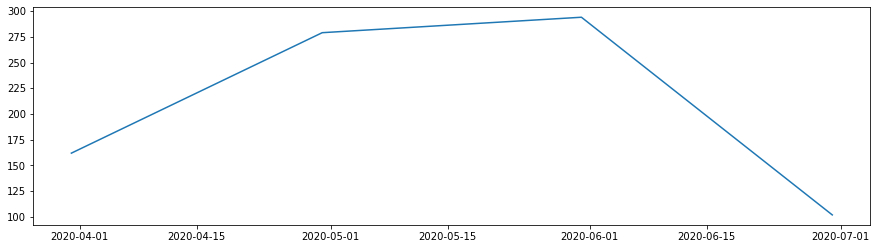

In [67]:
plt.figure(figsize=(15,4))
plt.plot(lazio)
plt.show()

In [68]:
lazio = lazio * 0.873
lazio.head()

,deceduti
data,
2020-03-31,141.426
2020-04-30,243.567
2020-05-31,256.662
2020-06-30,89.046


In [69]:
lazio.to_csv('csv/regioni_pesate/lazio.csv')

<h2>LIGURIA</h2>

In [70]:
liguria = df[df['denominazione_regione']=='Liguria']
liguria.head()

,data,denominazione_regione,deceduti
133,2020-03-01,Liguria,0
154,2020-03-02,Liguria,0
175,2020-03-03,Liguria,1
196,2020-03-04,Liguria,1
217,2020-03-05,Liguria,3


In [71]:
liguria.drop(['denominazione_regione'], axis=1, inplace=True)
liguria.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
133,2020-03-01,0
154,2020-03-02,0
175,2020-03-03,1
196,2020-03-04,1
217,2020-03-05,3


In [72]:
liguria = liguria.set_index('data')
liguria.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,3


In [73]:
liguria = liguria.diff()
liguria.fillna(0, inplace=True)
liguria.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,1.0
2020-03-04,0.0
2020-03-05,2.0


In [74]:
liguria = liguria.groupby(pd.Grouper(freq='M')).sum()
liguria.head()

,deceduti
data,
2020-03-31,428.0
2020-04-30,739.0
2020-05-31,298.0
2020-06-30,93.0


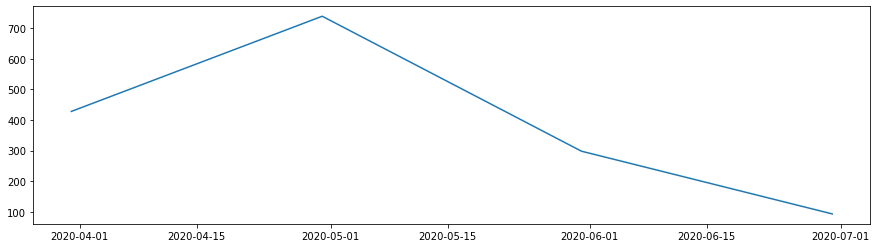

In [75]:
plt.figure(figsize=(15,4))
plt.plot(liguria)
plt.show()

In [76]:
liguria = liguria * 0.94
liguria.head()

,deceduti
data,
2020-03-31,402.32
2020-04-30,694.66
2020-05-31,280.12
2020-06-30,87.42


In [77]:
liguria.to_csv('csv/regioni_pesate/liguria.csv')

<h2>MARCHE</h2>

In [78]:
marche = df[df['denominazione_regione']=='Marche']
marche.head()

,data,denominazione_regione,deceduti
135,2020-03-01,Marche,0
156,2020-03-02,Marche,1
177,2020-03-03,Marche,2
198,2020-03-04,Marche,4
219,2020-03-05,Marche,4


In [79]:
marche.drop(['denominazione_regione'], axis=1, inplace=True)
marche.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
135,2020-03-01,0
156,2020-03-02,1
177,2020-03-03,2
198,2020-03-04,4
219,2020-03-05,4


In [80]:
marche = marche.set_index('data')
marche.head()

,deceduti
data,
2020-03-01,0
2020-03-02,1
2020-03-03,2
2020-03-04,4
2020-03-05,4


In [81]:
marche = marche.diff()
marche.fillna(0, inplace=True)
marche.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,1.0
2020-03-03,1.0
2020-03-04,2.0
2020-03-05,0.0


In [82]:
marche = marche.groupby(pd.Grouper(freq='M')).sum()
marche.head()

,deceduti
data,
2020-03-31,452.0
2020-04-30,454.0
2020-05-31,81.0
2020-06-30,4.0


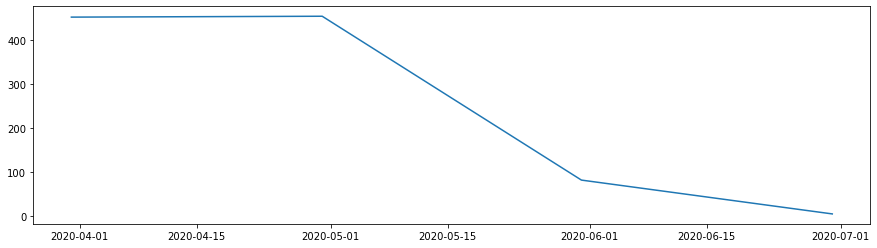

In [83]:
plt.figure(figsize=(15,4))
plt.plot(marche)
plt.show()

In [84]:
marche = marche * 0.908
marche.head()

,deceduti
data,
2020-03-31,410.416
2020-04-30,412.232
2020-05-31,73.548
2020-06-30,3.632


In [85]:
marche.to_csv('csv/regioni_pesate/marche.csv')

<h2>MOLISE</h2>

In [86]:
molise = df[df['denominazione_regione']=='Molise']
molise.head()

,data,denominazione_regione,deceduti
136,2020-03-01,Molise,0
157,2020-03-02,Molise,0
178,2020-03-03,Molise,0
199,2020-03-04,Molise,0
220,2020-03-05,Molise,0


In [87]:
molise.drop(['denominazione_regione'], axis=1, inplace=True)
molise.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
136,2020-03-01,0
157,2020-03-02,0
178,2020-03-03,0
199,2020-03-04,0
220,2020-03-05,0


In [88]:
molise = molise.set_index('data')
molise.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [89]:
molise = molise.diff()
molise.fillna(0, inplace=True)
molise.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [90]:
molise = molise.groupby(pd.Grouper(freq='M')).sum()
molise.head()

,deceduti
data,
2020-03-31,9.0
2020-04-30,12.0
2020-05-31,1.0
2020-06-30,1.0


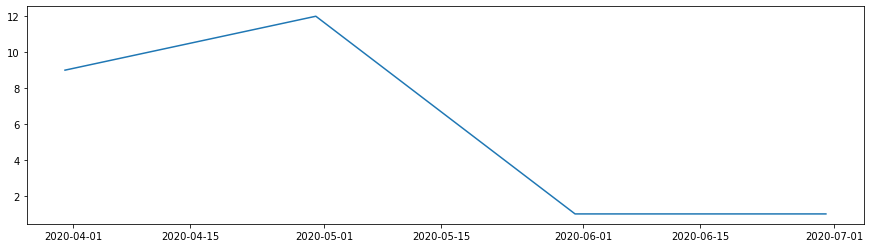

In [91]:
plt.figure(figsize=(15,4))
plt.plot(molise)
plt.show()

In [92]:
molise = molise * 0.926
molise.head()

,deceduti
data,
2020-03-31,8.334
2020-04-30,11.112
2020-05-31,0.926
2020-06-30,0.926


In [93]:
molise.to_csv('csv/regioni_pesate/molise.csv')

<h2>TOSCANA</h2>

In [94]:
toscana = df[df['denominazione_regione']=='Toscana']
toscana.head()

,data,denominazione_regione,deceduti
143,2020-03-01,Toscana,0
164,2020-03-02,Toscana,0
185,2020-03-03,Toscana,0
206,2020-03-04,Toscana,0
227,2020-03-05,Toscana,0


In [95]:
toscana.drop(['denominazione_regione'], axis=1, inplace=True)
toscana.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
143,2020-03-01,0
164,2020-03-02,0
185,2020-03-03,0
206,2020-03-04,0
227,2020-03-05,0


In [96]:
toscana = toscana.set_index('data')
toscana.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [97]:
toscana = toscana.diff()
toscana.fillna(0, inplace=True)
toscana.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [98]:
toscana = toscana.groupby(pd.Grouper(freq='M')).sum()
toscana.head()

,deceduti
data,
2020-03-31,244.0
2020-04-30,598.0
2020-05-31,199.0
2020-06-30,63.0


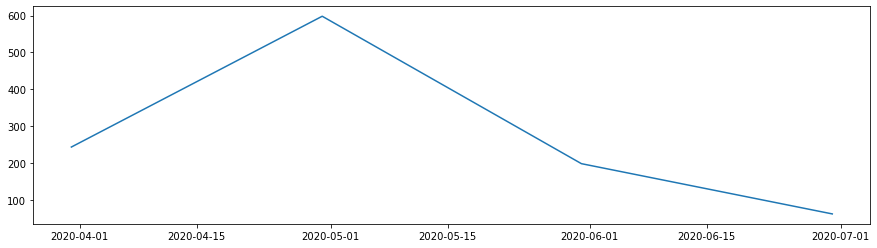

In [99]:
plt.figure(figsize=(15,4))
plt.plot(toscana)
plt.show()

In [100]:
toscana = toscana * 0.901
toscana.head()

,deceduti
data,
2020-03-31,219.844
2020-04-30,538.798
2020-05-31,179.299
2020-06-30,56.763


In [101]:
toscana.to_csv('csv/regioni_pesate/toscana.csv')

<h2>PIEMONTE</h2>

In [102]:
piemonte = df[df['denominazione_regione']=='Piemonte']
piemonte.head()

,data,denominazione_regione,deceduti
139,2020-03-01,Piemonte,0
160,2020-03-02,Piemonte,0
181,2020-03-03,Piemonte,0
202,2020-03-04,Piemonte,0
223,2020-03-05,Piemonte,2


In [103]:
piemonte.drop(['denominazione_regione'], axis=1, inplace=True)
piemonte.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
139,2020-03-01,0
160,2020-03-02,0
181,2020-03-03,0
202,2020-03-04,0
223,2020-03-05,2


In [104]:
piemonte = piemonte.set_index('data')
piemonte.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,2


In [105]:
piemonte = piemonte.diff()
piemonte.fillna(0, inplace=True)
piemonte.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,2.0


In [106]:
piemonte = piemonte.groupby(pd.Grouper(freq='M')).sum()
piemonte.head()

,deceduti
data,
2020-03-31,854.0
2020-04-30,2212.0
2020-05-31,801.0
2020-06-30,223.0


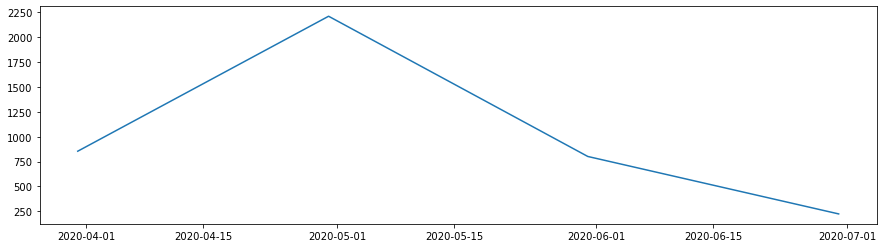

In [107]:
plt.figure(figsize=(15,4))
plt.plot(piemonte)
plt.show()

In [108]:
piemonte = piemonte * 0.942
piemonte.head()

,deceduti
data,
2020-03-31,804.468
2020-04-30,2083.704
2020-05-31,754.542
2020-06-30,210.066


In [109]:
piemonte.to_csv('csv/regioni_pesate/piemonte.csv')

<h2>TRENTINO ALTO ADIGE </h2>

Comprende la provicia autonoma di Trento e di Bolzano.

In [146]:
trento = df[df['denominazione_regione'] == 'P.A. Trento']
bolzano = df[df['denominazione_regione']=='P.A. Bolzano']
trentino = pd.merge(trento, bolzano, how='outer')
trentino.head()

,data,denominazione_regione,deceduti
0,2020-03-01,P.A. Trento,0
1,2020-03-02,P.A. Trento,0
2,2020-03-03,P.A. Trento,0
3,2020-03-04,P.A. Trento,0
4,2020-03-05,P.A. Trento,0


In [147]:
trentino.drop(['denominazione_regione'], axis=1, inplace=True)
trentino.head()

,data,deceduti
0,2020-03-01,0
1,2020-03-02,0
2,2020-03-03,0
3,2020-03-04,0
4,2020-03-05,0


In [148]:
trentino = trentino.groupby('data').sum()
trentino.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [149]:
trentino = trentino.diff()
trentino.fillna(0, inplace=True)
trentino.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [150]:
trentino = trentino.groupby(pd.Grouper(freq='M')).sum()
trentino.head()

,deceduti
data,
2020-03-31,240.0
2020-04-30,453.0
2020-05-31,60.0
2020-06-30,-56.0


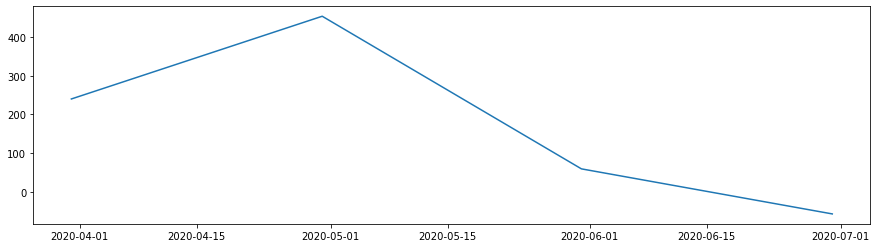

In [151]:
plt.figure(figsize=(15,4))
plt.plot(trentino)
plt.show()

In [152]:
trentino = trentino * 0.922
trentino.head()

,deceduti
data,
2020-03-31,221.280
2020-04-30,417.666
2020-05-31,55.320
2020-06-30,-51.632


In [153]:
trentino.to_csv('csv/regioni_pesate/trentino.csv')

<h2>PUGLIA</h2>

In [155]:
puglia = df[df['denominazione_regione']=='Puglia']
puglia.head()

,data,denominazione_regione,deceduti
140,2020-03-01,Puglia,0
161,2020-03-02,Puglia,0
182,2020-03-03,Puglia,0
203,2020-03-04,Puglia,1
224,2020-03-05,Puglia,1


In [156]:
puglia.drop(['denominazione_regione'], axis=1, inplace=True)
puglia.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
140,2020-03-01,0
161,2020-03-02,0
182,2020-03-03,0
203,2020-03-04,1
224,2020-03-05,1


In [158]:
puglia = puglia.set_index('data')
puglia.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,1
2020-03-05,1


In [159]:
puglia = puglia.diff()
puglia.fillna(0, inplace=True)
puglia.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,1.0
2020-03-05,0.0


In [160]:
puglia = puglia.groupby(pd.Grouper(freq='M')).sum()
puglia.head()

,deceduti
data,
2020-03-31,110.0
2020-04-30,305.0
2020-05-31,89.0
2020-06-30,41.0


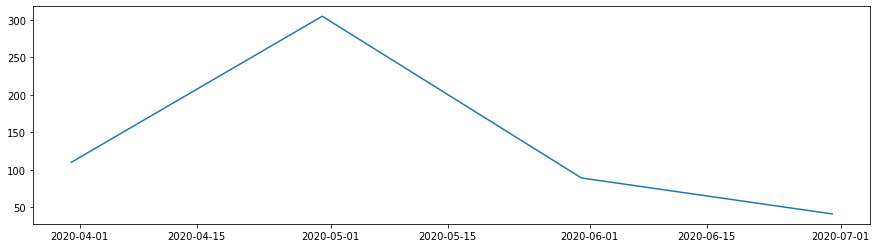

In [161]:
plt.figure(figsize=(15,4))
plt.plot(puglia)
plt.show()

In [162]:
puglia = puglia * 0.938
puglia.head()

,deceduti
data,
2020-03-31,103.180
2020-04-30,286.090
2020-05-31,83.482
2020-06-30,38.458


In [163]:
puglia.to_csv('csv/regioni_pesate/puglia.csv')

<h2>SARDEGNA</h2>

In [165]:
sardegna = df[df['denominazione_regione']=='Sardegna']
sardegna.head()

,data,denominazione_regione,deceduti
141,2020-03-01,Sardegna,0
162,2020-03-02,Sardegna,0
183,2020-03-03,Sardegna,0
204,2020-03-04,Sardegna,0
225,2020-03-05,Sardegna,0


In [166]:
sardegna.drop(['denominazione_regione'], axis=1, inplace=True)
sardegna.head()

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,data,deceduti
141,2020-03-01,0
162,2020-03-02,0
183,2020-03-03,0
204,2020-03-04,0
225,2020-03-05,0


In [167]:
sardegna = sardegna.set_index('data')
sardegna.head()

,deceduti
data,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [168]:
sardegna = sardegna.diff()
sardegna.fillna(0, inplace=True)
sardegna.head()

,deceduti
data,
2020-03-01,0.0
2020-03-02,0.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0


In [169]:
sardegna = sardegna.groupby(pd.Grouper(freq='M')).sum()
sardegna.head()

,deceduti
data,
2020-03-31,31.0
2020-04-30,85.0
2020-05-31,14.0
2020-06-30,3.0


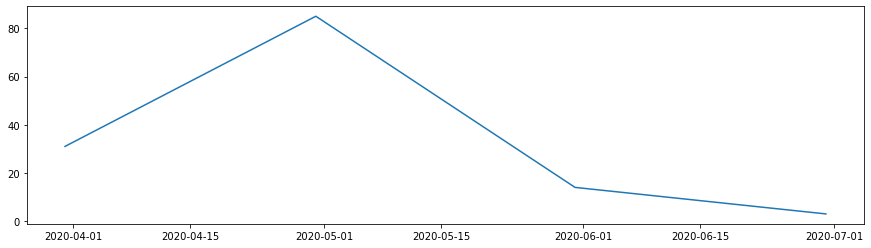

In [170]:
plt.figure(figsize=(15,4))
plt.plot(sardegna)
plt.show()

In [171]:
sardegna = sardegna * 0.936
sardegna.head()

,deceduti
data,
2020-03-31,29.016
2020-04-30,79.560
2020-05-31,13.104
2020-06-30,2.808


In [172]:
sardegna.to_csv('csv/regioni_pesate/sardegna.csv')